In [2]:
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt

from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon
 

In [2]:
nyc_evictions = pd.read_csv('Evictions.csv')

In [3]:
nyc_evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,75924/17,15444,163-43 PHROANE AVENUE,2,09/04/2018,Edward,Guida,Residential,QUEENS,11433,Not an Ejectment,Possession,40.690359,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica
1,54870/17,74389,25 EAST 193RD STREET,W21,04/05/2018,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.866452,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",04/25/2017,Ileana,Rivera,Residential,BROOKLYN,11204,Not an Ejectment,Possession,40.614423,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West
3,18327/19,355590,901 IRVINE STREET,"1,",09/16/2019,Thomas,Bia,Residential,BRONX,10474,Not an Ejectment,Possession,40.819644,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point
4,38744/17,168490,100 BELLAMY LOOP,5A,02/22/2018,Alfred,Locascio,Residential,BRONX,10475,Not an Ejectment,Possession,40.872610,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City


In [4]:
nyc_evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

1) Describe the data, its structure, data types, formats etc

The data is given in columns with each column having a specific data type. Overall the data table is mainly comprised of 'objects' and integers. The integers take two forms 'int' and 'float'. The table is broken into 23 different columns with over 66,000 rows of data. 

2) Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

In [125]:
#This line converts the executed date column to time data
nyc_evictions['Executed Date']= pd.to_datetime(nyc_evictions['Executed Date'])

In [6]:
#This will show evictions in chronological order showing the first and last eviction dates
nyc_evictions_years =  nyc_evictions.groupby('Executed Date')['Executed Date'].count()

In [7]:
print(nyc_evictions_years)

Executed Date
2017-01-03    102
2017-01-04    144
2017-01-05    127
2017-01-06    150
2017-01-09    105
             ... 
2021-01-12      1
2021-02-04      1
2021-02-09      1
2021-03-02      1
2070-03-29      1
Name: Executed Date, Length: 801, dtype: int64


In [8]:
#First Eviction Day
nyc_evictions['Executed Date'].min()

Timestamp('2017-01-03 00:00:00')

In [9]:
#Last Eviction Day 
nyc_evictions['Executed Date'].max()

Timestamp('2070-03-29 00:00:00')

In [10]:
#Grouping evictions by year
#https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
EvictionYears=nyc_evictions_years.groupby([(nyc_evictions_years.index.year)]).sum()
print(EvictionYears)

Executed Date
2017    22530
2018    21830
2019    18647
2020     3387
2021        7
2070        1
Name: Executed Date, dtype: int64


Evictions in this data set occured from 2017 to 2021 (with one outlier line that reads 2070, it looks like a typo or some other mistake). 2017 had the most evictions while 2021 had the least evictions. Evictions have decreased every year since 2017 with a sharp dip in evictions during 2020-2021 due to the pandemic, and cities halting evictions. 

3) What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for eachyear in the data)? Visualize the data for each year and discuss the trends you found.

In [246]:
#Overall ratio of residential to commercial evictions
nyc_evictions['Residential/Commercial'].value_counts()

Residential    60809
Commercial      5593
Name: Residential/Commercial, dtype: int64

In [247]:
#Converts date into year format
yeardata=pd.Series(pd.to_datetime(nyc_evictions['Executed Date']))
df = pd.DataFrame(dict(date_given=yeardata))
df['Year'] = df['date_given'].dt.strftime('%Y')
#df['Year'] = df['Executed Date'].dt.year
print(df['Year'])

0        2018
1        2018
2        2017
3        2019
4        2018
         ... 
66397    2019
66398    2018
66399    2019
66400    2020
66401    2018
Name: Year, Length: 66402, dtype: object


In [248]:
#Adds Year column to orignial eviction data
nyc_evictions['Year']=nyc_evictions['Executed Date'].dt.strftime('%Y')
nyc_evictions.head()


,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Name,Year,geometry
0,75924/17,15444,163-43 PHROANE AVENUE,2,2018-09-04,Edward,Guida,Residential,QUEENS,11433,...,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica,Edward Guida,2018,POINT (-73.78632 40.69036)
1,54870/17,74389,25 EAST 193RD STREET,W21,2018-04-05,Justin,Grossman,Residential,BRONX,10468,...,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North,Justin Grossman,2018,POINT (-73.89735 40.86645)
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",2017-04-25,Ileana,Rivera,Residential,BROOKLYN,11204,...,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West,Ileana Rivera,2017,POINT (-73.99606 40.61442)
3,18327/19,355590,901 IRVINE STREET,"1,",2019-09-16,Thomas,Bia,Residential,BRONX,10474,...,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point,Thomas Bia,2019,POINT (-73.88879 40.81964)
4,38744/17,168490,100 BELLAMY LOOP,5A,2018-02-22,Alfred,Locascio,Residential,BRONX,10475,...,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City,Alfred Locascio,2018,POINT (-73.82566 40.87261)


In [249]:
#2017 Residential/Commetical Data
year2017=nyc_evictions[nyc_evictions.Year.eq('2017')]
year2017['Residential/Commercial'].value_counts()

Residential    20810
Commercial      1720
Name: Residential/Commercial, dtype: int64

In [251]:
#2018 Residential/Commetical Data
year2018=nyc_evictions[nyc_evictions.Year.eq('2018')]
year2018['Residential/Commercial'].value_counts()

Residential    19988
Commercial      1842
Name: Residential/Commercial, dtype: int64

In [252]:
#2019 Residential/Commetical Data
year2019=nyc_evictions[nyc_evictions.Year.eq('2019')]
year2019['Residential/Commercial'].value_counts()

Residential    16975
Commercial      1672
Name: Residential/Commercial, dtype: int64

In [253]:
#2020 Residential/Commetical Data
year2020=nyc_evictions[nyc_evictions.Year.eq('2020')]
year2020['Residential/Commercial'].value_counts()

Residential    3035
Commercial      352
Name: Residential/Commercial, dtype: int64

In [254]:
#2021 Residential/Commetical Data
year2021=nyc_evictions[nyc_evictions.Year.eq('2021')]
year2021['Residential/Commercial'].value_counts()

Commercial    7
Name: Residential/Commercial, dtype: int64

Overall Ratio 
(Overall Residential v Commercial Evictions   |  10:1 )
(2017                  |                         12:1 )
(2018                  |                         10:1 )
(2019                  |                         10:1 )
(2020                  |                          8:1 )
(2021                  |                          0:7 )


2017 has the largest ratio gap between residential and commercial evictions, with the gap slowly reducing in size each year. Every year with the exception of 2021 has more residential evictions then commerical evictions. 2021 being the only year with zero residential evictions.

4) What are the full names of the top 5 eviction marshals(those who conducted the largest number of evictions over time)?

In [209]:
#Created dataframe for csv and then combined first & last names of all Marshals. The last line counts the occurances of the Marshals full name in the data
df = pd.DataFrame(nyc_evictions)
df["Name"] = df["Marshal First Name"] +" "+ df["Marshal Last Name"]
df['Name'].value_counts()

Justin Grossman        9173
Henry Daley            6487
Ileana Rivera          5842
Thomas Bia             5560
Edward Guida           5422
Danny Weinheim         5350
Richard McCoy          4023
Darlene Barone         3730
George Essock, Jr.     2661
Robert Renzulli        2403
Richard Capuano        1870
Maxine Chevlowe        1870
Gary Rose              1557
Alfred Locascio        1425
George Essock          1417
Ronald Pazant          1337
John Villanueva         822
Vadim Barbarovich       804
Kenneth Giachetta       771
Steven Powell           757
Howard Schain           713
Frank Siracusa          551
Bernard Blake           446
Charles Marchisotto     394
Salavatore Giglio       388
Bruce Kemp              366
Jeffrey Rose            145
Robert Solimine         118
Name: Name, dtype: int64

1) Justin Grossman
2) Henry Daley
3) Ileana Rivera
4) Thomas Bia
5) Edward Guida

5) How do 5 boroughs compare over time in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.

In [70]:
nyc_pop = pd.read_csv('New_York_City_Population_by_Borough__1950_-_2040.csv')

In [189]:
nyc_pop

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8008278,100.00,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73
5,Total Population,Staten Island,191555,2.43,221991,2.85,295443,3.74,352121,4.98,...,443728,5.54,468730,5.69,487155,5.70,497749,5.64,501109,5.55


In [263]:
#2017 Evictions by Borough 
year2017['BOROUGH'].value_counts()

BRONX            7662
BROOKLYN         6357
QUEENS           4325
MANHATTAN        3452
STATEN ISLAND     734
Name: BOROUGH, dtype: int64

In [264]:
#2018 Evictions by Borough 
year2018['BOROUGH'].value_counts()

BRONX            7140
BROOKLYN         6157
QUEENS           4452
MANHATTAN        3390
STATEN ISLAND     691
Name: BOROUGH, dtype: int64

In [265]:
#2019 Evictions by Borough 
year2019['BOROUGH'].value_counts()

BRONX            6188
BROOKLYN         5312
QUEENS           3705
MANHATTAN        2806
STATEN ISLAND     636
Name: BOROUGH, dtype: int64

In [266]:
#2020 Evictions by Borough 
year2020['BOROUGH'].value_counts()

BRONX            1061
BROOKLYN         1003
QUEENS            693
MANHATTAN         518
STATEN ISLAND     112
Name: BOROUGH, dtype: int64

In [267]:
#2021 Evictions by Borough 
year2021['BOROUGH'].value_counts()

BROOKLYN     3
QUEENS       2
MANHATTAN    1
BRONX        1
Name: BOROUGH, dtype: int64

Overall Bronx has the largest number of evictions despite having the second lowest overall percentage of NYC population (16.9%). Even when data is divided for a yearly basis the Bronx consistantly has more evictions than every other borough (with the exception of 2021). Brooklyn has the second most overall evictions and is consistantly the borough with the second most evictions (with the exception of 2021), Broolyn has 30.9% of the city'ss total population so this ratio makes more sense. Staen Island and Manhattan have the lowest eviction rates which reflects their population percentage of 5.7% and 19.2% respectivly. Queens is consistantly in the middle off the other four boroughs in terms of evictions it has 27.25% of the city's total population making their eviction rate much lower than the Bronx who has a simiilar population percentage.

6) Visualize the data as a choropleth map using NTA level,when the different shades represent the number of evictions in a particular NTA. Discuss your findings.

In [268]:
map = gpd.GeoDataFrame(
    nyc_evictions, geometry=gpd.points_from_xy(nyc_evictions.Longitude, nyc_evictions.Latitude))

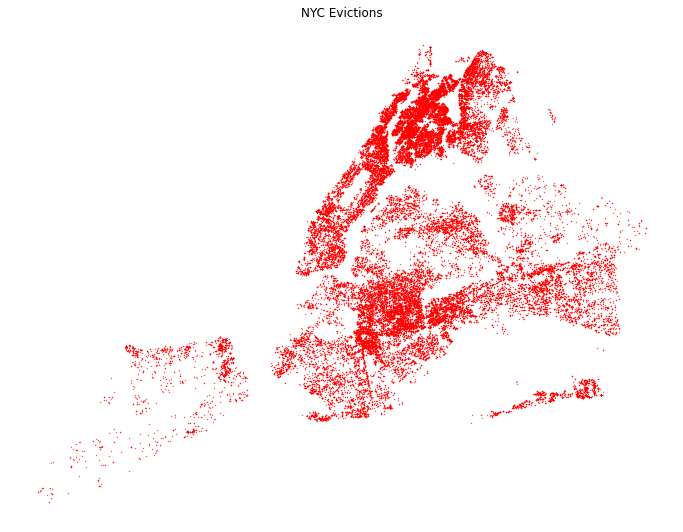

In [269]:
#Point Map of NYC Evictions
map.plot( color='red',legend=True,figsize=(12, 12),markersize=0.1)
plt.axis('off')
plt.title('NYC Evictions')
plt.show()

Question 5 showed the Bronx had the highest eviction rate which is reflected in the map. You can see the next densist area is Brooklyn. Staten Island has the lowest evictions nd is very sparsly populated. Manhattan and Queens have similar concentrations which reflects their positions in the middle of the eviction rates chart. 

7) Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections.

In [10]:
nyc_crime = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

In [11]:
map2 = gpd.GeoDataFrame(
    nyc_crime, geometry=gpd.points_from_xy(nyc_crime.Longitude, nyc_crime.Latitude))

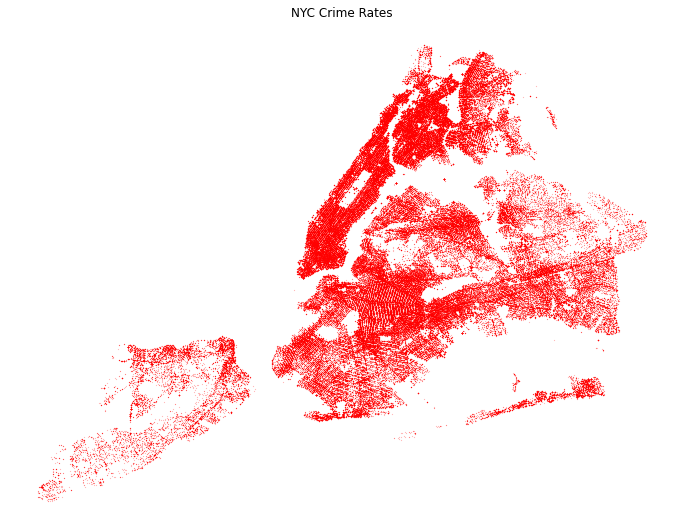

In [13]:
#Point Map of NYC Crime
map2.plot( color='red',legend=True,figsize=(12, 12),markersize=0.01)
plt.axis('off')
plt.title('NYC Crime Rates')
plt.show()

An additional factor can be the crime rates. This csv only has data from 2019 but reflects the crime rates across boroughs for misdimenors and felonies. Reported Crime Rates are highest in the Bronx, Brooklyn and Manhattan similar to the eviction rates in these areas. THe outlier in this map is Manhattan, whose crime rates are higher that Queens whihc is the reverse of eviction data. There is a coorelation between reported crime and eviction rate at a borough level. 